In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

%run HelperFunctions.ipynb

df_train = pd.read_csv('../HousePricePrediction/train.csv')
df_test = pd.read_csv('../HousePricePrediction/test.csv')
df_train.set_index('Id', inplace=True)
df_test.set_index('Id', inplace=True)

df = pd.concat([df_train, df_test]).reset_index(drop=True)

prices = df[["SalePrice"]]
pd.options.display.max_seq_items = 3000
pd.set_option('display.max_columns', None)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [2]:
print(df_train.shape)
print(df_test.shape)
print(df.shape)

(1460, 80)
(1459, 79)
(2919, 80)


In [3]:
for (columnName, columnData) in df.iteritems():
    if len(df[columnName].value_counts().to_list()) == 1:
        print(columnName + " is not needed")

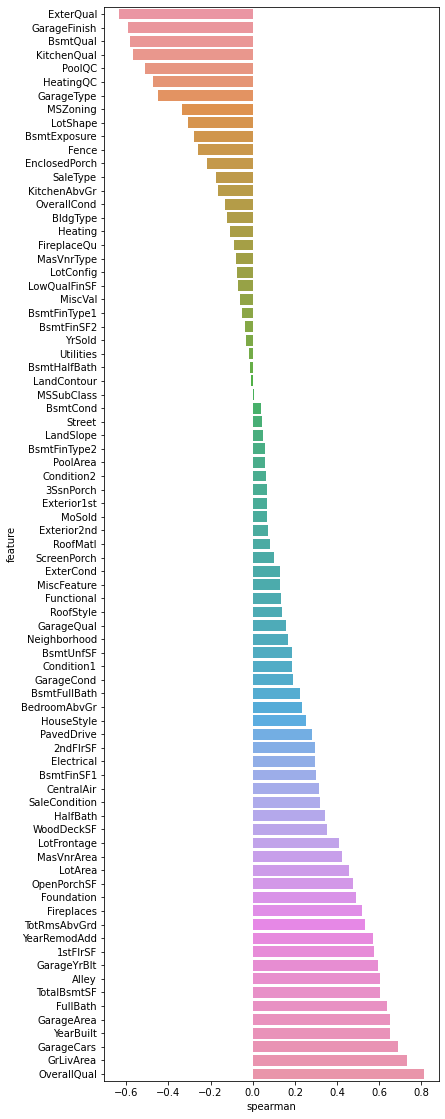

In [4]:
show_corr(df_train, df_train.drop('SalePrice', axis=1).columns)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

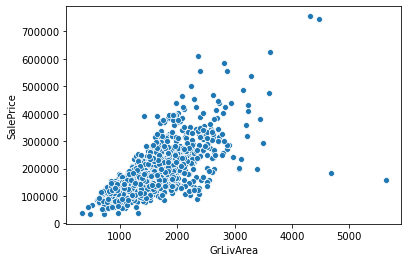

In [5]:
sns.scatterplot(data=df_train, y='SalePrice', x='GrLivArea')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

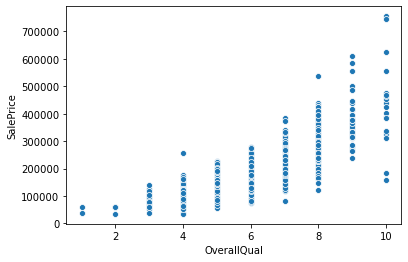

In [6]:
sns.scatterplot(data=df_train, y='SalePrice', x='OverallQual')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

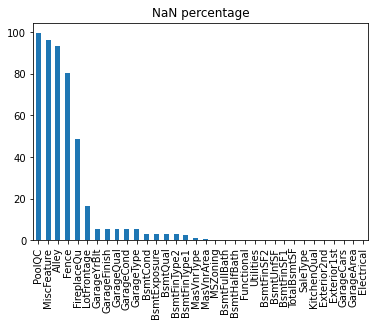

In [8]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
showNanPercentage(df)

In [9]:
df = handle_null(df)
df.drop('SalePrice', axis=1).isnull().sum().sum() #Only SalePrice column has NaN

0

In [10]:
df[['1stFlrSF', '2ndFlrSF', 'GrLivArea']]

,1stFlrSF,2ndFlrSF,GrLivArea
0,856,854,1710
1,1262,0,1262
2,920,866,1786
3,961,756,1717
4,1145,1053,2198
...,...,...,...
2914,546,546,1092
2915,546,546,1092
2916,1224,0,1224
2917,970,0,970


<AxesSubplot:xlabel='TotalArea', ylabel='SalePrice'>

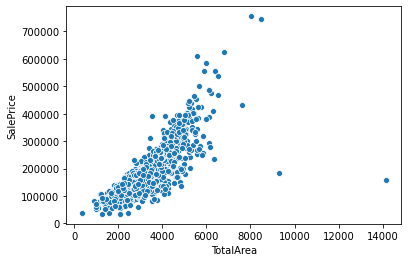

In [11]:
df.columns
totalSF = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
df['TotalArea'] = df[totalSF].sum(axis=1)

# df['TotalSF'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'])
# df['Total_Bath'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
# df['Total_Porch_Area'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
# df['exists_pool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# df['exists_garage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# df['exists_fireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# df['exists_bsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# df['old_house'] = df['YearBuilt'].apply(lambda x: 1 if x <1990 else 0)

sns.scatterplot(data=df, y='SalePrice', x='TotalArea')

In [12]:
df.drop(df[(df['TotalArea'] > 12000) & (df['SalePrice'] < 300000)].index, inplace=True)
# df.drop(df[(df['OverallQual'] == 4) & (df['SalePrice'] < 200000)].index, inplace=True)

# df = df.drop(df[(df.OverallQual==4) & (df.SalePrice>200000)].index)
# df = df.drop(df[(df.OverallQual==10) & (df.SalePrice<200000)].index)
# df = df.drop(df[(df.TotalSF>=10000) & (df.SalePrice<200000)].index)
# df = df.drop(df[(df.GrLivArea>4500) & (df.SalePrice<200000)].index)
# df = df.drop(df[(df.GrLivArea<3000) & (df.SalePrice>575000)].index)
# df = df.drop(df[(df.GarageArea>1200) & (df.SalePrice<165000)].index)
# df = df.drop(df[(df.Total_Bath.isin([5,6])) & (df.SalePrice<200000)].index)
# df = df.drop(df[(df.TotRmsAbvGrd==10) & (df.SalePrice>700000)].index)
# df = df.drop(df[(df.YearBuilt<1900) & (df.SalePrice>250000)].index)
# df = df.drop(df[(df.YearBuilt>2000) & (df.SalePrice<100000)].index)
# df = df.drop(df[(df.YearRemodAdd<1970) & (df.SalePrice>350000)].index)
# df = df.drop(df[(df.MasVnrArea>=1400) & (df.SalePrice<250000)].index)
# df = df.drop(df[(df.GarageYrBlt<1960) & (df.SalePrice>340000)].index)
# df = df.drop(df[(df.Total_Porch_Area>600) & (df.SalePrice<50000)].index)
# df = df.drop(df[(df.LotFrontage>150) & (df.SalePrice<100000)].index)
# df = df.drop(df[(df.GarageFinish.isin([1,2])) & (df.SalePrice>470000)].index)
# df = df.drop(df[(df.old_house==0) & (df.SalePrice<100000)].index)
# df = df.drop(df[(df.old_house==1) & (df.SalePrice>400000)].index)
# df = df.drop(df[(df.KitchenQual==2) & (df.SalePrice>600000)].index)
# df = df.drop(df[(df.KitchenQual==3) & (df.SalePrice>360000)].index)
# df = df.drop(df[(df.ExterQual==2) & (df.SalePrice>550000)].index)


In [13]:
prices = df[["SalePrice"]]
df = pd.concat([fix_skew(df.drop('SalePrice', axis=1)), prices], axis=1)

In [14]:
df = pd.get_dummies(df)
df.shape

(2918, 333)

In [15]:
num_train = df.shape[0] - df['SalePrice'].isnull().sum()
df_train = df[:num_train]
X_train = df_train.drop('SalePrice', axis=1)
Y_train = np.log(df_train[["SalePrice"]] + 1)
df_test = df[num_train:]
X_test = df_test.drop('SalePrice', axis=1)
Y_train.head()

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV


kf = KFold(n_splits=10, shuffle=True, random_state=42)

# rf = RandomForestRegressor(n_estimators=1200,
#                           max_depth=15,
#                           min_samples_split=5,
#                           min_samples_leaf=5,
#                           max_features=None,
#                           oob_score=True,
#                           random_state=42)

ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 
                10, 15, 18, 20, 30, 50, 75, 100]

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

cv_score(ridge, X_train, Y_train, kf)

0.12338567084257343

In [18]:
#0.1156181496108363 without RobustScaler, one removed outlier
#0.11538579545112863 with RobustScaler, one removed outlier

In [17]:
ridge.fit(X_train, Y_train)
submission = pd.read_csv("../HousePricePrediction/sample_submission.csv")
submission.iloc[:,1] = np.expm1(ridge.predict(X_test))
submission.to_csv("submission.csv", index=False)

In [18]:
myAnswer = pd.read_csv("../HousePricePrediction/submission.csv")
myAnswer.head()

,Id,SalePrice
0,1461,120328.115081
1,1462,157701.702726
2,1463,183885.133819
3,1464,202113.289062
4,1465,194416.457883
